## Medical Cost Insurance Dataset

#### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from  math import sqrt as sqrt
from sklearn.preprocessing import LabelEncoder

#### Import data

In [2]:
insurance_data = pd.read_excel("insurance.xlsx")

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.shape

(1338, 7)

In [5]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Encode the categorical columns

In [8]:
class MultiColumnLabelEncoder:

    def __init__(self, columns=None):
        self.columns = columns # array of column names to encode


    def fit(self, X, y=None):
        self.encoders = {}
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            self.encoders[col] = LabelEncoder().fit(X[col])
        return self


    def transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].transform(X[col])
        return output


    def fit_transform(self, X, y=None):
        return self.fit(X,y).transform(X)


    def inverse_transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].inverse_transform(X[col])
        return output

In [9]:
var_mod = MultiColumnLabelEncoder(columns=['sex','smoker','region'])
insurance_data = var_mod.fit_transform(insurance_data)
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#### Converting into Arrays

In [10]:
X=insurance_data[['age','sex','bmi','children','smoker','region']].values
Y=insurance_data[['charges']].values

#### Train Test Split

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=42)

In [12]:
print("xtrain",xtrain.shape)
print("xtest",xtest.shape)
print("ytrain",xtrain.shape)
print("ytest",ytest.shape)

xtrain (1003, 6)
xtest (335, 6)
ytrain (1003, 6)
ytest (335, 1)


#### Executing Linear Reression

In [13]:
lr=LinearRegression()

In [14]:
model=lr.fit(xtrain,ytrain)

In [15]:
ypred=model.predict(xtest)

#### Finding Accuracy

In [16]:
accuracy = explained_variance_score(ytest, ypred)
print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

Accuracy : 76.691%


In [17]:
print("MAE",mean_absolute_error(ytest,ypred))

MAE 4252.8564557923655


In [18]:
print("MSE",mean_squared_error(ytest,ypred))

MSE 35174149.327053055


In [19]:
#Root mean Squared error

print("RMSE",sqrt(mean_squared_error(ytest,ypred)))

RMSE 5930.779824530081


#### R - Squared - Goodness of fit

In [20]:
r2= r2_score(ytest,ypred)
print("R^2 (coefficient of determination ,)",r2)

R^2 (coefficient of determination ,) 0.7668905583460909


#### Combining multiple arrays

In [28]:
multiple_arrays = np.column_stack((xtest, ytest, ypred))

In [29]:
multiple_arrays.shape

(335, 8)

In [30]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#### Converting arrays into DataFrame

In [31]:
final_data = pd.DataFrame(multiple_arrays, columns =['age','sex','bmi','children','smoker','region','Actual Charges','Predicted Charges'])

In [34]:
final_data = final_data.astype({"sex": int, "smoker": int, "region": int})

In [ ]:
final_data.head()

#### Decode the numerical values to Original Values

In [35]:
final_data = var_mod.inverse_transform(final_data)

In [36]:
final_data.head()

,age,sex,bmi,children,smoker,region,Actual Charges,Predicted Charges
0,45.0,female,25.175,2.0,no,northeast,9095.06825,8917.541064
1,36.0,female,30.020,0.0,no,northwest,5272.17580,7057.659731
2,64.0,female,26.885,0.0,yes,northwest,29330.98315,36899.870810
3,46.0,male,25.745,3.0,no,northwest,9301.89355,9546.158773
4,19.0,male,31.920,0.0,yes,northwest,33750.29180,26950.914146


In [38]:
final_data.shape

(335, 8)

#### Plotting Actual vs Predicted Charges

In [40]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return

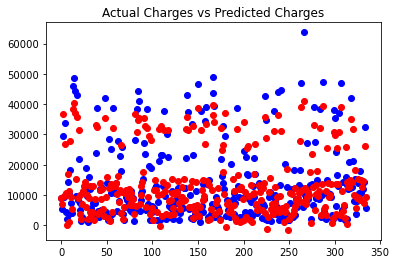

In [42]:
plotGraph(final_data['Actual Charges'], final_data['Predicted Charges'], "Actual Charges vs Predicted Charges")